1.Find intersection points

393
3138


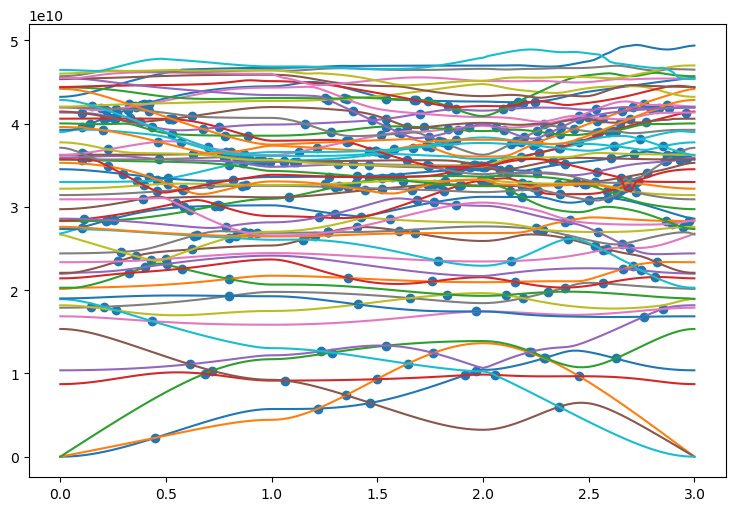

In [4]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.interpolate, scipy.optimize

n=50                 #number of concerned bands sorting from low-freq to high-freq
width=0.005           #width of k-refinement region near crossing
seg=10             #segmentation of k-refinement region near crossing

            #####Reading data#####
filename='alpha00_roughK.txt'
with open(filename,'rt') as raw_data:
    data=np.loadtxt(raw_data,delimiter=',',skiprows=8)
    #print(data.shape)
data1=data[:,0:n+1]           #Backup for later calculation
num_bands=data.shape[1]
num_k=data.shape[0]
deltak=[]                   #The first col of the data is kspace
kspace_0=[0]
for i in range (1,num_k):
    deltak.append(data[:,0][i]-data[:,0][i-1])
    kspace_0.append(kspace_0[-1]+deltak[-1])
data=data[0:len(data),1:len(data[1,:])]
dataReorder=np.zeros((np.transpose(data)).shape)        #Initialize dataReorder
dataReorder[:,0:5]=np.transpose(data)[:,0:5]
Omaga_limit=max(sum(data[:,0:n].tolist(),[]))           #Intersections that frequency higher than Omaga_limit will not be considered
#np.savetxt('dataReorder.csv', np.transpose(dataReorder), delimiter = ',') 

"""plt.rcParams['figure.figsize'] = (9,6)
for i in range(0,n):
    plt.plot(data[:,i])
plt.legend(labels=['before reordering'],loc='best')
plt.show()"""

            #####Making all bands smooth(cross each other when intersecting)#####
def closest(list, target):
    a=[]
    for i in list:
        a.append(abs(target-i))
    return a.index(min(a))

N=min(num_bands-1,n+10)
for i in range(0,N):
    for j in range(5,num_k):
        position=closest(data[j], dataReorder[i][j-1]+deltak[j-1]/deltak[j-2]*(dataReorder[i][j-1]-dataReorder[i][j-2]))
        dataReorder[i][j]=data[j][position]
        data[j][position]=99999999999999999

#np.savetxt('Bands_alpha00_reorder.csv', np.transpose(dataReorder), delimiter = ',')

            #####Finding the k value of every crossing points#####
K=np.zeros([N,N,99]).tolist()
Omega=np.zeros([N,N,99]).tolist()
for i in range(0,N):
    for j in range(i,N):
        l=0
        for k in range(2,len(data)-2):
            if (dataReorder[i][k]-dataReorder[j][k])*(dataReorder[i][k+1]-dataReorder[j][k+1])<0:
                freq11=dataReorder[i][k]
                freq12=dataReorder[i][k+1]
                freq21=dataReorder[j][k]
                freq22=dataReorder[j][k+1]
                Omega_intersect=freq11+(freq11-freq21)/(freq11-freq12-freq21+freq22)*(freq12-freq11)
                if Omega_intersect<Omaga_limit:
                    K[i][j][l]=kspace_0[k]+deltak[k]*(freq11-freq21)/(freq11-freq12-freq21+freq22)
                    Omega[i][j][l]=Omega_intersect
                    l=l+1
        del K[i][j][l:99]
        del Omega[i][j][l:99]
    for j in range(0,N):
        if len(K[i][j])==99:
            K[i][j]=[]
            Omega[i][j]=[]
K_flatten=sum(sum(K, []),[])
Omega_flatten=sum(sum(Omega, []),[])
print(len(K_flatten))
#print(sorted(K_flatten))
Kpoints=np.zeros([len(K_flatten),seg])
for i in range(0,len(K_flatten)):
    Kpoints[i]=np.linspace(K_flatten[i]-width/2,K_flatten[i]+width/2,seg)
K_refined=sorted(sum([Kpoints[i].tolist() for i in range(0,len(K_flatten))],[]))
numof_k=len(K_refined)
cycling=1
for j in range(0,5):
    i=1
    while cycling==1:
        if abs(K_refined[i]-K_refined[i-1])<width/seg/3:
            K_refined=np.delete(K_refined,i,None)
            numof_k=numof_k-1
        i=i+1
        if i==numof_k-1:
            break
print(len(K_refined))

plt.rcParams['figure.figsize'] = (9,6)
K_flatten2=[]
for i in range(0,len(K_flatten)):
    K_flatten2.append(K_flatten[i])
plt.figure( dpi=100)
plt.scatter(K_flatten2,Omega_flatten)
for i in range(0,N):
    plt.plot(kspace_0,dataReorder[i,:])
plt.show()

            #####Output refined k points#####
#print(K_refined)
#np.savetxt('k_bands_crossing.txt',np.array(K_flatten), newline=',', fmt='%s')
#np.savetxt('k_points.csv',K_refined, delimiter = ',') 
np.savetxt('k_points00.txt',np.array(K_refined), newline=',', fmt='%s')


2.Refinement and verification I

Crossing detected:
333
[0.04750759600312872, 0.06404070269084707, 0.06617379986799467, 0.0686110408415308, 0.07574847828568795, 0.07889418620601181, 0.09263589532322317, 0.09753236540228659, 0.1013207734317215, 0.10238861288242501, 0.10248712223079927, 0.11465438771020324, 0.11605573058579104, 0.13738976261854946, 0.1389228318107593, 0.14718962223502477, 0.15087364361973699, 0.16605337833553363, 0.1933280359605136, 0.20026154678041377, 0.20549225549450773, 0.20569336655015802, 0.21456697604470723, 0.21665407039567305, 0.22287576258227687, 0.22636009843479324, 0.22638099337459122, 0.22665452818453535, 0.22783268686505684, 0.24729479397989199, 0.2558698402121576, 0.25649815604550563, 0.2584881300498818, 0.2626304564613873, 0.2658177647615024, 0.27208927324274024, 0.2866365307042315, 0.2945478268381289, 0.32081144469850215, 0.3243653231249184, 0.3294702411946341, 0.3383220767247697, 0.35398186657117264, 0.3574109874243083, 0.3606693411744125, 0.37400657935238873, 0.38224094617570753, 0.39

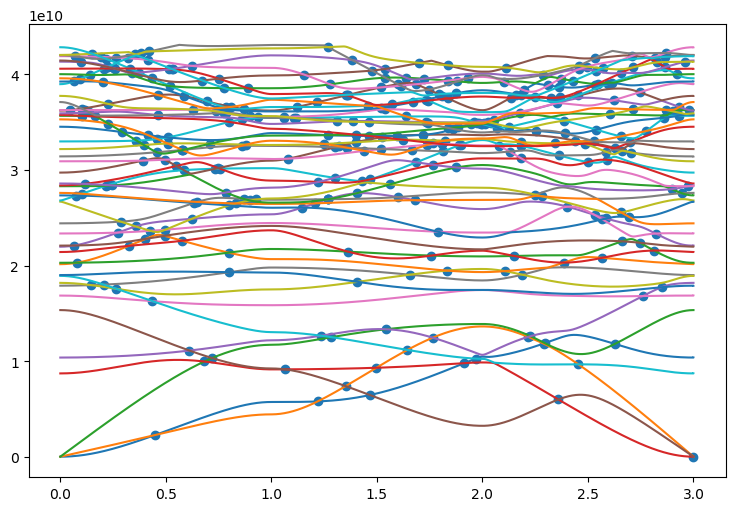

In [7]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.interpolate, scipy.optimize

width2=0.00025           #width of k-refinement region near crossing
seg2=10             #segmentation of k-refinement region near crossing

            #####Reading data#####
filename1='alpha00_roughK.txt'
filename2='alpha00_refinedK.txt'
with open(filename1,'rt') as raw_data:
    data1=np.loadtxt(raw_data,delimiter=',',skiprows=8)
data1=data1[:,0:n+1]
with open(filename2,'rt') as raw_data:
    data2=np.loadtxt(raw_data,delimiter=',',skiprows=8)
    #print(data.shape)
data=np.vstack((data1,data2))
data=data[np.lexsort(data[:,::-1].T)]
num_k=data.shape[0]
for j in range(0,10):
    i=0
    cycling=1
    while cycling==1:
        if abs(data[:,0][i]-data[:,0][i-1])<width2/seg2/3:
            data=np.delete(data,i,axis=0)
            num_k=num_k-1
        i=i+1
        if i==num_k-2:
            break
deltak=[]
kspace=[0]
for i in range (1,num_k):
    deltak.append(data[:,0][i]-data[:,0][i-1])
    kspace.append(kspace[-1]+deltak[-1])
data=data[:,1:len(data[1,:])]
dataReorder=np.zeros((np.transpose(data)).shape)
dataReorder[:,0:5]=np.transpose(data)[:,0:5]
Omaga_limit=max(sum(data[:,0:n].tolist(),[]))
#np.savetxt('dataReorder.csv', np.transpose(dataReorder), delimiter = ',') 

"""plt.rcParams['figure.figsize'] = (9,6)
for i in range(0,n):
    plt.plot(data[:,i])
plt.legend(labels=['before reordering'],loc='best')
plt.show()"""

            #####Making all bands smooth(cross each other when intersecting)#####
def closest(list, target):
    a=[]
    for i in list:
        a.append(abs(target-i))
    return a.index(min(a))

N=data.shape[1]
for i in range(0,N):
    for j in range(5,num_k):
        position=closest(data[j], dataReorder[i][j-1]+deltak[j-1]/deltak[j-2]*(dataReorder[i][j-1]-dataReorder[i][j-2]))
        dataReorder[i][j]=data[j][position]
        data[j][position]=99999999999999999

#np.savetxt('Bands_alpha00_reorder.csv', np.transpose(dataReorder), delimiter = ',')

            #####Finding the k value of every crossing points#####
K=np.zeros([N,N,99]).tolist()
Omega=np.zeros([N,N,99]).tolist()
for i in range(0,N):
    for j in range(i,N):
        l=0
        for k in range(2,len(data)-2):
            if (dataReorder[i][k]-dataReorder[j][k])*(dataReorder[i][k+1]-dataReorder[j][k+1])<0:
                freq11=dataReorder[i][k]
                freq12=dataReorder[i][k+1]
                freq21=dataReorder[j][k]
                freq22=dataReorder[j][k+1]
                Omega_intersect=freq11+(freq11-freq21)/(freq11-freq12-freq21+freq22)*(freq12-freq11)
                if Omega_intersect<Omaga_limit:
                    K[i][j][l]=kspace[k]+deltak[k]*(freq11-freq21)/(freq11-freq12-freq21+freq22)
                    Omega[i][j][l]=Omega_intersect
                    l=l+1
        del K[i][j][l:99]
        del Omega[i][j][l:99]
    for j in range(0,N):
        if len(K[i][j])==99:
            K[i][j]=[]
            Omega[i][j]=[]
K_flatten_II=sum(sum(K, []),[])
Omega_flatten_II=sum(sum(Omega, []),[])
found_repulsion_II=[]
"""list0=list(set(np.round(K_flatten,2))-set(np.round(K_flatten_II,2)))
for i in range(0,len(list0)):
    found_repulsion_II.append(K_flatten[closest(K_flatten,list0[i])])"""
for l in range(1,100):
    for i in range(0,len(K_flatten)):
        m=0
        for j in range(0,len(K_flatten_II)):
            if abs(K_flatten[i]-K_flatten_II[j])>1e-2*(1-l/100):
                m=m+1
        if m==len(K_flatten_II):
            found_repulsion_II.append(K_flatten[i])
    if len(found_repulsion_II)+len(K_flatten_II)>=len(K_flatten):
        break
print("Crossing detected:")
print(len(K_flatten_II))
print(sorted(K_flatten_II))
print("")
print("Repulsion found in previous refinement:")
print(len(found_repulsion_II))
print(sorted(found_repulsion_II))
Kpoints_II=[]
for i in range(0,len(K_flatten_II)):
    Kpoints_II.append(np.linspace(K_flatten_II[i]-width2/2,K_flatten_II[i]+width2/2,seg2))
for i in range(0,len(found_repulsion_II)):
    Kpoints_II.append(np.linspace(found_repulsion_II[i]-width/2,found_repulsion_II[i]+width/2,seg))
K_refined_II=sorted(sum([Kpoints_II[i].tolist() for i in range(0,len(Kpoints_II))],[]))
for j in range(0,5):
    i=1
    while cycling==1:
        if abs(K_refined_II[i]-K_refined_II[i-1])<width2/seg2/3:
            K_refined_II=np.delete(K_refined_II,i,None)
            numof_k=numof_k-1
        i=i+1
        if i==numof_k-1:
            break
print("")
print("Number of generated k points:")
print(len(K_refined_II))

print("")
print("Sorting status:")
l=0
for i in range (0,N):
    if abs(dataReorder[i][0]-dataReorder[i][-1])>1e7:
        l=l+1
if l==0:
    print("         Sorting compeleted.")
    np.savetxt('final_k_mesh_00.txt',np.array(kspace), newline=',', fmt='%s')
else:
    print("         Sorting not compelete. %d bands are discontinious. Try further refinement."%(l))

plt.rcParams['figure.figsize'] = (9,6)
plt.figure(dpi=100)
plt.scatter(K_flatten_II,Omega_flatten_II)
for i in range(0,N):
    plt.plot(kspace,dataReorder[i,:])
plt.show()

            #####Output refined k points#####
#print(K_refined)
#np.savetxt('k_bands_crossing_II.txt',np.array(Omega_flatten_II), newline=',', fmt='%s')
#np.savetxt('k_points.csv',K_refined, delimiter = ',') 
np.savetxt('k_points00_II.txt',np.array(K_refined_II), newline=',', fmt='%s')


3.Refinement and verification II

Crossing detected:
25
[0.4350986237485936, 0.45005562852150177, 0.6119328047641848, 0.6824856624650625, 0.7190441011689465, 1.064948766110221, 1.2189914687680476, 1.2354191082132395, 1.2849076691169448, 1.3520075752260643, 1.4668949981440906, 1.4971662699429757, 1.5435912694751073, 1.6444074701043194, 1.7647892639055605, 1.9146125778528795, 1.968051735966193, 2.2164165410512093, 2.227620011265719, 2.2893821508778482, 2.2954910003276088, 2.359605696249385, 2.454528256055198, 2.6275753598283673, 2.759861923487456]

Repulsion found in previous refinement:
1
[1.0653996628135514]

Number of generated k points:
555

Sorting status:
         Sorting not compelete. 6 bands are discontinious. Try further refinement.


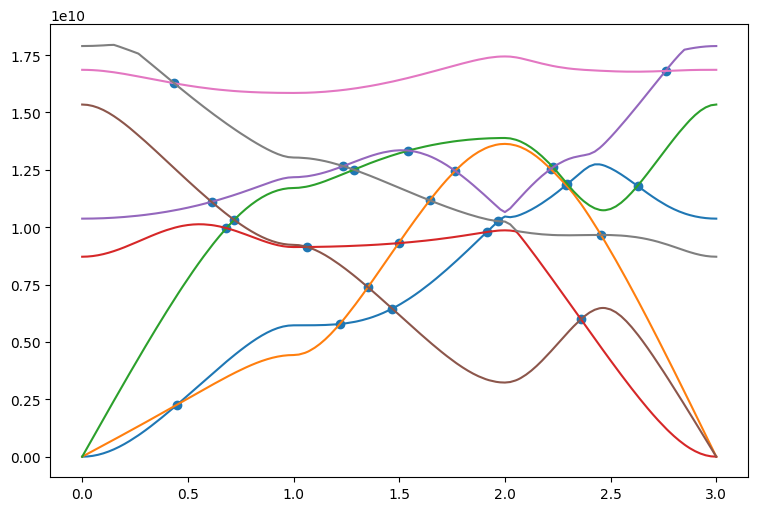

In [82]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.interpolate, scipy.optimize

width3=0.000015           #width of k-refinement region near crossing
seg3=20                  #segmentation of k-refinement region near crossing

            #####Reading data#####
filename1='alpha00_roughK.txt'
filename2='alpha00_refinedK.txt'
filename3='alpha00_refinedK_II.txt'
with open(filename1,'rt') as raw_data:
    data1=np.loadtxt(raw_data,delimiter=',',skiprows=8)
data1=data1[:,0:n+1]
with open(filename2,'rt') as raw_data:
    data2=np.loadtxt(raw_data,delimiter=',',skiprows=8)
with open(filename3,'rt') as raw_data:
    data3=np.loadtxt(raw_data,delimiter=',',skiprows=8)
    #print(data.shape)
data=np.vstack((data1,data2,data3))
data=data[np.lexsort(data[:,::-1].T)]
num_k=data.shape[0]
for j in range(0,10):
    i=0
    cycling=1
    while cycling==1:
        if abs(data[:,0][i]-data[:,0][i-1])<width3/seg3/3:
            data=np.delete(data,i,axis=0)
            num_k=num_k-1
        i=i+1
        if i==num_k-1:
            break
deltak=[]
kspace=[0]
for i in range (1,num_k):
    deltak.append(data[:,0][i]-data[:,0][i-1])
    kspace.append(kspace[-1]+deltak[-1])
data=data[:,1:len(data[1,:])]
dataReorder=np.zeros((np.transpose(data)).shape)
dataReorder[:,0:5]=np.transpose(data)[:,0:5]
Omaga_limit=max(sum(data[:,0:n].tolist(),[]))
#np.savetxt('dataReorder.csv', np.transpose(dataReorder), delimiter = ',') 

"""plt.rcParams['figure.figsize'] = (9,6)
for i in range(0,n):
    plt.plot(data[:,i])
plt.legend(labels=['before reordering'],loc='best')
plt.show()"""

            #####Making all bands smooth(cross each other when intersecting)#####
def closest(list, target):
    a=[]
    for i in list:
        a.append(abs(target-i))
    return a.index(min(a))

N=data.shape[1]
for i in range(0,N):
    for j in range(5,num_k):
        position=closest(data[j], dataReorder[i][j-1]+deltak[j-1]/deltak[j-2]*(dataReorder[i][j-1]-dataReorder[i][j-2]))
        dataReorder[i][j]=data[j][position]
        data[j][position]=999999999999999999

#np.savetxt('Bands_alpha00_reorder.csv', np.transpose(dataReorder), delimiter = ',')

            #####Finding the k value of every crossing points#####
K=np.zeros([N,N,99]).tolist()
Omega=np.zeros([N,N,99]).tolist()
for i in range(0,N):
    for j in range(i,N):
        l=0
        for k in range(2,len(data)-2):
            if (dataReorder[i][k]-dataReorder[j][k])*(dataReorder[i][k+1]-dataReorder[j][k+1])<0:
                freq11=dataReorder[i][k]
                freq12=dataReorder[i][k+1]
                freq21=dataReorder[j][k]
                freq22=dataReorder[j][k+1]
                Omega_intersect=freq11+(freq11-freq21)/(freq11-freq12-freq21+freq22)*(freq12-freq11)
                if Omega_intersect<Omaga_limit:
                    K[i][j][l]=kspace[k]+deltak[k]*(freq11-freq21)/(freq11-freq12-freq21+freq22)
                    Omega[i][j][l]=Omega_intersect
                    l=l+1
        del K[i][j][l:99]
        del Omega[i][j][l:99]
    for j in range(0,N):
        if len(K[i][j])==99:
            K[i][j]=[]
            Omega[i][j]=[]
K_flatten_temp=sum(sum(K, []),[])
K_flatten_III=[K_flatten_temp[0]]
for i in range(1,len(K_flatten_temp)):
    if abs(K_flatten_temp[i]-K_flatten_temp[i-1])>0.001:
        K_flatten_III.append(K_flatten_temp[i])
Omega_flatten_temp=sum(sum(Omega, []),[])
Omega_flatten_III=[Omega_flatten_temp[0]]
for i in range(1,len(Omega_flatten_temp)):
    if abs(Omega_flatten_temp[i]-Omega_flatten_temp[i-1])>1e7:
        Omega_flatten_III.append(Omega_flatten_temp[i])
found_repulsion_III=[]
list0=list(set(np.round(K_flatten_II,2))-set(np.round(K_flatten_III,2)))
for i in range(0,len(list0)):
    found_repulsion_III.append(K_flatten_II[closest(K_flatten_II,list0[i])])
print("Crossing detected:")
print(len(K_flatten_III))
print(sorted(K_flatten_III))
print("")
print("Repulsion found in previous refinement:")
print(len(found_repulsion_III))
print(sorted(found_repulsion_III))
Kpoints_III=[]
for i in range(0,len(K_flatten_III)):
    Kpoints_III.append(np.linspace(K_flatten_III[i]-width3/2,K_flatten_III[i]+width3/2,seg3))
for i in range(0,len(found_repulsion_III)):
    Kpoints_III.append(np.linspace(found_repulsion_III[i]-width2/2,found_repulsion_III[i]+width2/2,seg2))
for i in range(0,len(found_repulsion_II)):
    Kpoints_III.append(np.linspace(found_repulsion_II[i]-width/2,found_repulsion_II[i]+width/2,seg))
K_refined_III=sorted(sum([Kpoints_III[i].tolist() for i in range(0,len(Kpoints_III))],[]))
print("")
print("Number of generated k points:")
print(len(K_refined_III))

print("")
print("Sorting status:")
l=0
for i in range (0,N):
    if abs(dataReorder[i][0]-dataReorder[i][-1])>1e7:
        l=l+1
if l==0:
    print("         Sorting compeleted.")
    np.savetxt('final_k_mesh_00.txt',np.array(kspace), newline=',', fmt='%s')
else:
    print("         Sorting not compelete. %d bands are discontinious. Try further refinement."%(l))

plt.rcParams['figure.figsize'] = (9,6)
plt.figure(dpi=100)
plt.scatter(K_flatten_III,Omega_flatten_III)
for i in range(0,N):
    plt.plot(kspace,dataReorder[i,:])
plt.show()

            #####Output refined k points#####
#print(K_refined)
#np.savetxt('k_bands_crossing_III.txt',np.array(Omega_flatten_III), newline=',', fmt='%s')
#np.savetxt('k_points.csv',K_refined, delimiter = ',') 
np.savetxt('k_points00_III.txt',np.array(K_refined_III), newline=',', fmt='%s')


4.Refinement and verification III

Crossing detected:
112
[0.4500572759432113, 0.45015406864275764, 0.45016276039960196, 0.4501638657145246, 0.4501641470347746, 1.21890568531964, 1.218910820807811, 1.218911915173225, 1.2189124737719232, 1.2189914687680476, 1.4668949981440906, 1.4669118275870672, 1.466949900800554, 1.466950985369486, 1.466951543897472, 2.3595678332828527, 2.3595755363471067, 2.359577183153922, 2.359577619710405, 1.9145712980548142, 1.9145797168064544, 1.9146762019560144, 1.914812657185049, 2.9999996626023475, 1.3518795051247403, 1.3519220958202072, 1.3519601591324437, 1.3519695180219762, 1.3520128755718048, 1.3520231847947317, 1.3520482120427033, 1.352076588125229, 0.6824827379245644, 0.6824842156181563, 0.682485175215455, 2.0083523128059477, 1.5432695146866449, 1.5435519913257196, 1.5435554027670404, 1.5435569409106167, 1.5435576958843766, 1.5435597856747876, 1.5435743300572706, 1.5436207058345726, 0.7190441011689465, 0.7191658025505517, 0.7191795450611349, 2.4545240108008786, 2.454533575623812, 1.28490

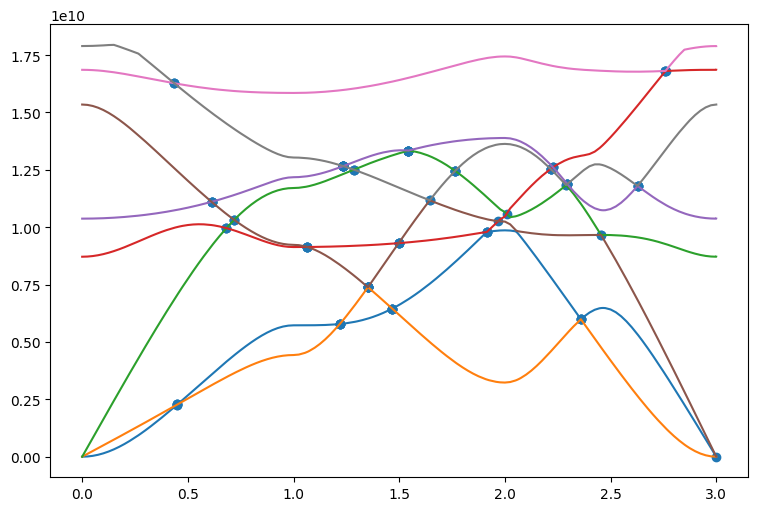

In [108]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.interpolate, scipy.optimize

width4=0.0000002           #width of k-refinement region near crossing
seg4=10                  #segmentation of k-refinement region near crossing

            #####Reading data#####
filename1='alpha00_roughK.txt'
filename2='alpha00_refinedK.txt'
filename3='alpha00_refinedK_II.txt'
filename4='alpha00_refinedK_III.txt'
with open(filename1,'rt') as raw_data:
    data1=np.loadtxt(raw_data,delimiter=',',skiprows=8)
data1=data1[:,0:n+1]
with open(filename2,'rt') as raw_data:
    data2=np.loadtxt(raw_data,delimiter=',',skiprows=8)
with open(filename3,'rt') as raw_data:
    data3=np.loadtxt(raw_data,delimiter=',',skiprows=8)
with open(filename4,'rt') as raw_data:
    data4=np.loadtxt(raw_data,delimiter=',',skiprows=8)
    #print(data.shape)
data=np.vstack((data1,data2,data3,data4))
data=data[np.lexsort(data[:,::-1].T)]
num_k=data.shape[0]
for j in range(0,10):
    i=0
    cycling=1
    while cycling==1:
        if abs(data[:,0][i]-data[:,0][i-1])<width3/seg3/3:
            data=np.delete(data,i,axis=0)
            num_k=num_k-1
        i=i+1
        if i==num_k-1:
            break
deltak=[]
for i in range (1,num_k):
    deltak.append(data[:,0][i]-data[:,0][i-1])
kspace=data[:,0]
data=data[:,1:len(data[1,:])]
dataReorder=np.zeros((np.transpose(data)).shape)
dataReorder[:,0:5]=np.transpose(data)[:,0:5]
Omaga_limit=max(sum(data[:,0:n].tolist(),[]))
#np.savetxt('dataReorder.csv', np.transpose(dataReorder), delimiter = ',') 

"""
plt.rcParams['figure.figsize'] = (9,6)
for i in range(0,n):
    plt.plot(kspace,data[:,i])
plt.legend(labels=['before reordering'],loc='best')
plt.show()"""

            #####Making all bands smooth(cross each other when intersecting)#####
def closest(list, target):
    a=[]
    for i in list:
        a.append(abs(target-i))
    return a.index(min(a))

N=data.shape[1]
for i in range(0,N):
    for j in range(5,num_k):
        position=closest(data[j], dataReorder[i][j-1]+deltak[j-1]/deltak[j-2]*(dataReorder[i][j-1]-dataReorder[i][j-2]))
        dataReorder[i][j]=data[j][position]
        data[j][position]=999999999999999999

#np.savetxt('Bands_alpha00_reorder.csv', np.transpose(dataReorder), delimiter = ',')

            #####Finding the k value of every crossing points#####
K=np.zeros([N,N,99]).tolist()
Omega=np.zeros([N,N,99]).tolist()
for i in range(0,N):
    for j in range(i,N):
        l=0
        for k in range(2,len(data)-2):
            if (dataReorder[i][k]-dataReorder[j][k])*(dataReorder[i][k+1]-dataReorder[j][k+1])<0:
                freq11=dataReorder[i][k]
                freq12=dataReorder[i][k+1]
                freq21=dataReorder[j][k]
                freq22=dataReorder[j][k+1]
                Omega_intersect=freq11+(freq11-freq21)/(freq11-freq12-freq21+freq22)*(freq12-freq11)
                if Omega_intersect<Omaga_limit:
                    K_next=kspace[k]+deltak[k]*(freq11-freq21)/(freq11-freq12-freq21+freq22)
                    if l==0 or abs(K_next-K[i][j][l-1])>width3/seg3/10:
                        K[i][j][l]=K_next
                        Omega[i][j][l]=Omega_intersect
                        l=l+1
        del K[i][j][l:99]
        del Omega[i][j][l:99]
    for j in range(0,N):
        if len(K[i][j])==99:
            K[i][j]=[]
            Omega[i][j]=[]
K_flatten_IV=sum(sum(K, []),[])
Omega_flatten_IV=sum(sum(Omega, []),[])
found_repulsion_IV=[]
list0=list(set(np.round(K_flatten_III,2))-set(np.round(K_flatten_IV,2)))
for i in range(0,len(list0)):
    found_repulsion_IV.append(K_flatten_III[closest(K_flatten_III,list0[i])])
print("Crossing detected:")
print(len(K_flatten_IV))
print(K_flatten_IV)
print("")
print("Repulsion found in previous refinement:")
print(len(found_repulsion_IV))
print(found_repulsion_IV)
Kpoints_IV=[]
for i in range(0,len(K_flatten_IV)):
    Kpoints_IV.append(np.linspace(K_flatten_IV[i]-width4/2,K_flatten_IV[i]+width4/2,seg4))
for i in range(0,len(found_repulsion_IV)):
    Kpoints_IV.append(np.linspace(found_repulsion_IV[i]-width3/2,found_repulsion_IV[i]+width3/2,seg3))
for i in range(0,len(found_repulsion_III)):
    Kpoints_IV.append(np.linspace(found_repulsion_III[i]-width2/2,found_repulsion_III[i]+width2/2,seg2))
for i in range(0,len(found_repulsion_II)):
    Kpoints_IV.append(np.linspace(found_repulsion_II[i]-width/2,found_repulsion_II[i]+width/2,seg))
K_refined_IV=sorted(sum([Kpoints_IV[i].tolist() for i in range(0,len(Kpoints_IV))],[]))
print("")
print("Number of generated k points:")
print(len(K_refined_IV))

print("")
print("Sorting status:")
l=0
for i in range (0,N):
    if abs(dataReorder[i][0]-dataReorder[i][-1])>1e7:
        l=l+1
if l==0:
    print("         Sorting compeleted.")
    np.savetxt('final_k_mesh_00.txt',np.array(kspace), newline=',', fmt='%s')
else:
    print("         Sorting not compelete. %d bands are discontinious. Try further refinement."%(l))

plt.rcParams['figure.figsize'] = (9,6)
plt.figure(dpi=100)
plt.scatter(K_flatten_IV,Omega_flatten_IV)
for i in range(0,N):
    plt.plot(kspace,dataReorder[i,:])
plt.show()

            #####Output refined k points#####
#print(K_refined)
#np.savetxt('k_bands_crossing_IV.txt',np.array(Omega_flatten_IV), newline=',', fmt='%s')
#np.savetxt('k_points.csv',K_refined, delimiter = ',') 
np.savetxt('k_points00_IV.txt',np.array(K_refined_IV), newline=',', fmt='%s')


5.Refinement and verification IV

Crossing detected:
20
[0.45016331370385915, 1.2189124737721382, 1.4669515438976533, 2.3595755363468034, 0.6824830918787601, 1.0654003295766221, 1.497109964427276, 2.454533575623917, 1.6443917388280067, 2.289392396182397, 1.7647572381279457, 2.2164778228359987, 0.6121361493076222, 1.2849838057847458, 2.29547831232068, 2.627395931469517, 1.5435597856748406, 2.227636990391231, 0.4355081508908855, 2.7596511427678854]

Repulsion found in previous refinement:
0
[]

Number of generated k points:
2270

Sorting status:
         Sorting compeleted.


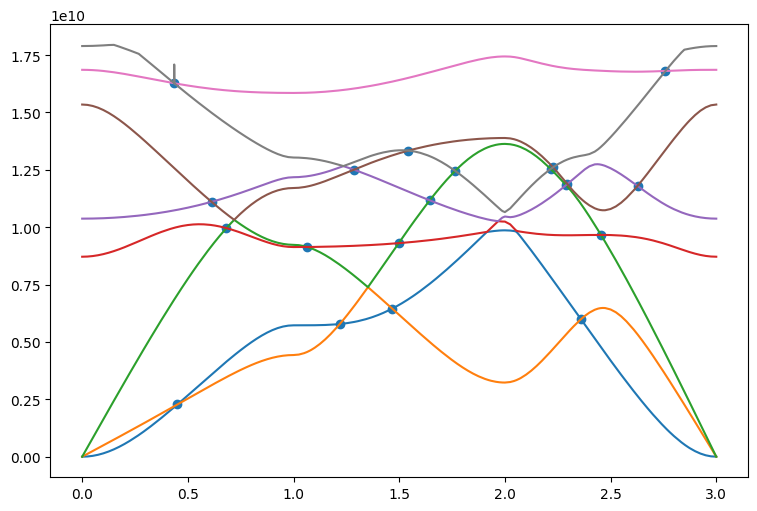

In [55]:

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scipy.interpolate, scipy.optimize

width5=0.00000002           #width of k-refinement region near crossing
seg5=10                  #segmentation of k-refinement region near crossing

            #####Reading data#####
filename1='alpha00_roughK.txt'
filename2='alpha00_refinedK.txt'
filename3='alpha00_refinedK_II.txt'
filename4='alpha00_refinedK_III.txt'
filename5='alpha00_refinedK_IV.txt'
with open(filename1,'rt') as raw_data:
    data1=np.loadtxt(raw_data,delimiter=',',skiprows=8)
data1=data1[:,0:n+1]
with open(filename2,'rt') as raw_data:
    data2=np.loadtxt(raw_data,delimiter=',',skiprows=8)
with open(filename3,'rt') as raw_data:
    data3=np.loadtxt(raw_data,delimiter=',',skiprows=8)
with open(filename4,'rt') as raw_data:
    data4=np.loadtxt(raw_data,delimiter=',',skiprows=8)
with open(filename5,'rt') as raw_data:
    data5=np.loadtxt(raw_data,delimiter=',',skiprows=8)
    #print(data.shape)
data=np.vstack((data1,data2,data3,data4,data5))
data=data[np.lexsort(data[:,::-1].T)]
    #print(data.shape)
num_k=data.shape[0]
for j in range(0,10):
    i=0
    cycling=1
    while cycling==1:
        if abs(data[:,0][i]-data[:,0][i-1])<width3/seg3/3:
            data=np.delete(data,i,axis=0)
            num_k=num_k-1
        i=i+1
        if i==num_k-1:
            break
deltak=[]
kspace=[0]
for i in range (1,num_k):
    deltak.append(data[:,0][i]-data[:,0][i-1])
    kspace.append(kspace[-1]+deltak[-1])
data=data[:,1:len(data[1,:])]
dataReorder=np.zeros((np.transpose(data)).shape)
dataReorder[:,0:5]=np.transpose(data)[:,0:5]
Omaga_limit=max(sum(data[:,0:n].tolist(),[]))
#np.savetxt('dataReorder.csv', np.transpose(dataReorder), delimiter = ',') 

"""plt.rcParams['figure.figsize'] = (9,6)
for i in range(0,n):
    plt.plot(data[:,i])
plt.legend(labels=['before reordering'],loc='best')
plt.show()"""

            #####Making all bands smooth(cross each other when intersecting)#####
def closest(list, target):
    a=[]
    for i in list:
        a.append(abs(target-i))
    return a.index(min(a))

N=data.shape[1]
for i in range(0,N):
    for j in range(5,num_k):
        position=closest(data[j], dataReorder[i][j-1]+deltak[j-1]/deltak[j-2]*(dataReorder[i][j-1]-dataReorder[i][j-2]))
        dataReorder[i][j]=data[j][position]
        data[j][position]=999999999999999999

#np.savetxt('Bands_alpha00_reorder.csv', np.transpose(dataReorder), delimiter = ',')

            #####Finding the k value of every crossing points#####
K=np.zeros([N,N,99]).tolist()
Omega=np.zeros([N,N,99]).tolist()
for i in range(0,N):
    for j in range(i,N):
        l=0
        for k in range(2,len(data)-2):
            if (dataReorder[i][k]-dataReorder[j][k])*(dataReorder[i][k+1]-dataReorder[j][k+1])<0:
                freq11=dataReorder[i][k]
                freq12=dataReorder[i][k+1]
                freq21=dataReorder[j][k]
                freq22=dataReorder[j][k+1]
                Omega_intersect=freq11+(freq11-freq21)/(freq11-freq12-freq21+freq22)*(freq12-freq11)
                if Omega_intersect<Omaga_limit:
                    K[i][j][l]=kspace[k]+deltak[k]*(freq11-freq21)/(freq11-freq12-freq21+freq22)
                    Omega[i][j][l]=Omega_intersect
                    l=l+1
        del K[i][j][l:99]
        del Omega[i][j][l:99]
    for j in range(0,N):
        if len(K[i][j])==99:
            K[i][j]=[]
            Omega[i][j]=[]
K_flatten_V=sum(sum(K, []),[])
Omega_flatten_V=sum(sum(Omega, []),[])
found_repulsion_V=[]
list0=list(set(np.round(K_flatten_IV,2))-set(np.round(K_flatten_V,2)))
for i in range(0,len(list0)):
    found_repulsion_V.append(K_flatten_IV[closest(K_flatten_IV,list0[i])])
print("Crossing detected:")
print(len(K_flatten_V))
print(K_flatten_V)
print("")
print("Repulsion found in previous refinement:")
print(len(found_repulsion_V))
print(found_repulsion_V)
Kpoints_V=[]
for i in range(0,len(K_flatten_V)-1):
    Kpoints_V.append(np.linspace(K_flatten_V[i]-width5/2,K_flatten_V[i]+width5/2,seg5))
for i in range(0,len(found_repulsion_V)-1):
    Kpoints_V.append(np.linspace(found_repulsion_V[i]-width4/2,found_repulsion_V[i]+width4/2,seg4))
for i in range(0,len(found_repulsion_IV)-1):
    Kpoints_V.append(np.linspace(found_repulsion_IV[i]-width3/2,found_repulsion_IV[i]+width3/2,seg3))
for i in range(0,len(found_repulsion_III)-1):
    Kpoints_V.append(np.linspace(found_repulsion_III[i]-width2/2,found_repulsion_III[i]+width2/2,seg2))
for i in range(0,len(found_repulsion_II)-1):
    Kpoints_V.append(np.linspace(found_repulsion_II[i]-width/2,found_repulsion_II[i]+width/2,seg))
K_refined_V=sorted(sum([Kpoints_V[i].tolist() for i in range(0,len(Kpoints_V))],[])+kspace)
print("")
print("Number of generated k points:")
print(len(K_refined_V))

print("")
print("Sorting status:")
l=0
for i in range (0,N):
    if abs(dataReorder[i][0]-dataReorder[i][-1])>1e7:
        l=l+1
if l==0:
    print("         Sorting compeleted.")
    np.savetxt('final_k_mesh_00.txt',np.array(kspace), newline=',', fmt='%s')
else:
    print("         Sorting not compelete. %d bands are discontinious. Try further refinement."%(l))

plt.rcParams['figure.figsize'] = (9,6)
plt.figure(dpi=100)
plt.scatter(K_flatten_V,Omega_flatten_V)
for i in range(0,N):
    plt.plot(kspace,dataReorder[i,:])
plt.show()

            #####Output refined k points#####
#print(K_refined)
#np.savetxt('k_bands_crossing_V.txt',np.array(Omega_flatten_V), newline=',', fmt='%s')
#np.savetxt('k_points.csv',K_refined, delimiter = ',') 
np.savetxt('k_points00_IV.txt',np.array(K_refined_V), newline=',', fmt='%s')
